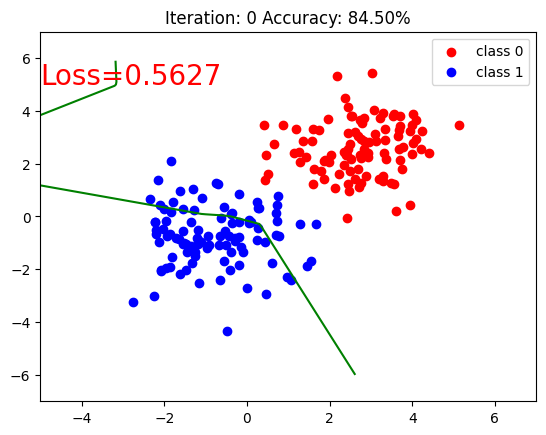

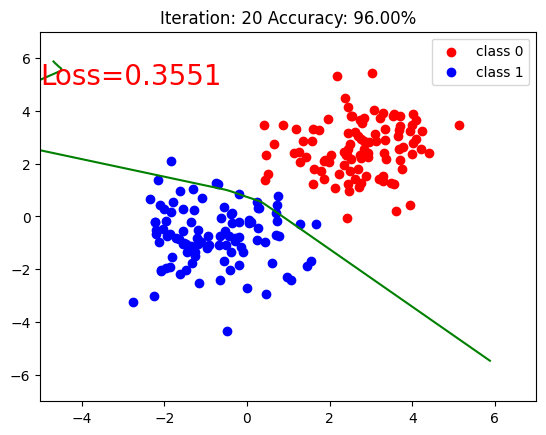

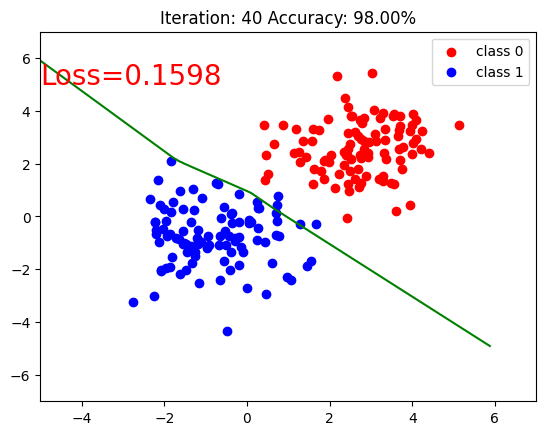

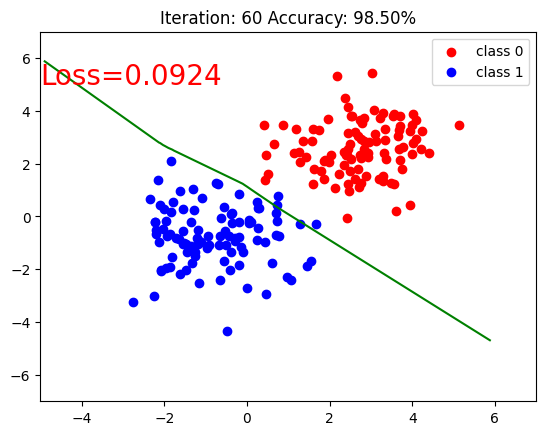

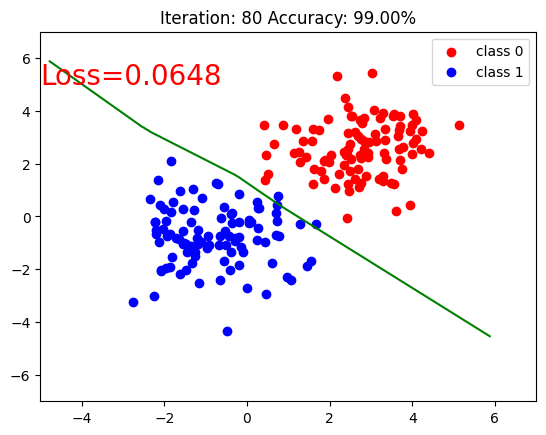

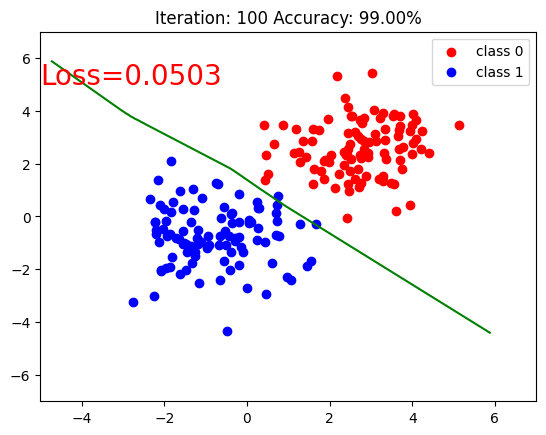

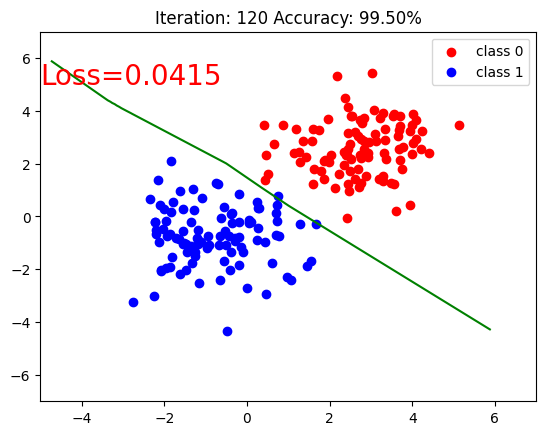

In [1]:
# -*- coding: utf-8 -*-

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(10)

# ============================ step 1/5 Generate Data ============================
sample_nums = 100
mean_value = 1.7
bias = 1
n_data = torch.ones(sample_nums, 2)
x0 = torch.normal(mean_value * n_data, 1) + bias
y0 = torch.zeros(sample_nums)
x1 = torch.normal(-mean_value * n_data, 1) + bias
y1 = torch.ones(sample_nums)
train_x = torch.cat((x0, x1), 0)
train_y = torch.cat((y0, y1), 0)

# ============================ step 2/5 Define the Neural Network ============================
class TwoLayerNet(nn.Module):
    def __init__(self):
        '''
        网络结构: 这个模型包含了两个隐藏层（hidden layers）：

        self.fc1 = nn.Linear(2, 5): 第一个隐藏层包含5个神经元，接受2个输入特征。这个层执行线性变换。

        self.relu = nn.ReLU(): 使用ReLU（Rectified Linear Unit）作为激活函数，将第一个隐藏层的输出进行非线性变换。

        self.fc2 = nn.Linear(5, 1): 第二个隐藏层包含1个神经元，接受前一个隐藏层的5个输出特征。这个层同样执行线性变换。
        '''
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(2, 5)  # First hidden layer with 5 neurons
        self.relu = nn.ReLU()       # ReLU activation function
        self.fc2 = nn.Linear(5, 1)  # Second hidden layer with 1 neuron (output)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return torch.sigmoid(x)

net = TwoLayerNet()

# ============================ step 3/5 Choose the Loss Function ============================
loss_fn = nn.BCELoss()

# ============================ step 4/5 Choose the Optimizer ============================
lr = 0.01
optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.9)

# ============================ step 5/5 Train the Model ============================
for iteration in range(1000):
    # Forward pass
    y_pred = net(train_x)

    # Compute loss
    loss = loss_fn(y_pred.squeeze(), train_y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Plot the results
    if iteration % 20 == 0:
        mask = y_pred.ge(0.5).float().squeeze()
        correct = (mask == train_y).sum()
        acc = correct.item() / train_y.size(0)

        plt.scatter(x0.data.numpy()[:, 0], x0.data.numpy()[:, 1], c='r', label='class 0')
        plt.scatter(x1.data.numpy()[:, 0], x1.data.numpy()[:, 1], c='b', label='class 1')

        plt.xlim(-5, 7)
        plt.ylim(-7, 7)

        plot_x = np.arange(-6, 6, 0.1)
        plot_y = np.arange(-6, 6, 0.1)
        xx, yy = np.meshgrid(plot_x, plot_y)
        xy = np.c_[xx.ravel(), yy.ravel()]
        Z = net(torch.Tensor(xy)).detach().numpy().reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=[0.5], colors='g')

        plt.text(-5, 5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.title("Iteration: {} Accuracy: {:.2%}".format(iteration, acc))
        plt.legend()

        plt.show()
        plt.pause(0.5)

        if acc > 0.99:
            break
